In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

data = pd.read_csv("data_clear.csv") 
d = data.to_numpy() 

N = d.shape[0]

print("number of people: ", N)

normal = d[:,0:12]
slow   = d[:,12:24]
fast   = d[:,24:36]

# 1 -> male
# 2 -> female
sexes = np.array([1,2,1,1,2,1,2,2,2,2,1,1])

number of people:  61


In [4]:
n_value = 0
s_value = 0
f_value = 0

n_total = 0
s_total = 0
f_total = 0

n_correct = []
s_correct = []
f_correct = []

# guessed sex of models (>= 0 is man <= 0 is woman)
n_model = np.zeros(12) 
f_model = np.zeros(12)
s_model = np.zeros(12)

for person in range(N):
    correct = 0
    total = 0
    
    person_n_total = 0
    person_n_value = 0
    person_f_total = 0
    person_f_value = 0
    person_s_total = 0
    person_s_value = 0
    
    for i in range(12):
        if(math.isnan(normal[person, i])):
            continue
            
        if(normal[person, i] == 1):
            n_model[i] += 1
        else:
            n_model[i] -= 1
            
        person_n_total += 1;
        if(normal[person, i] == sexes[i]):
            person_n_value += 1
            
    for i in range(12):
        if(math.isnan(fast[person, i])):
            continue
        
        if(fast[person, i] == 1):
            f_model[i] += 1
        else:
            f_model[i] -= 1
        
        person_f_total += 1
        if(fast[person, i] == sexes[i]):
            person_f_value += 1
        
    for i in range(12):
        if(math.isnan(slow[person, i])):
            continue
            
        if(slow[person, i] == 1):
            s_model[i] += 1
        else:
            s_model[i] -= 1
            
        person_s_total += 1
        if(slow[person, i] == sexes[i]):
            person_s_value += 1
    
    n_total += person_n_total
    n_value += person_n_value
    f_total += person_f_total
    f_value += person_f_value
    s_total += person_s_total
    s_value += person_s_value
    
    if(person_n_total != 0):
        n_correct.append(person_n_value / person_n_total)
    if(person_f_total != 0):
        f_correct.append(person_f_value / person_f_total)
    if(person_s_total != 0):
        s_correct.append(person_s_value / person_s_total)

print(n_value, s_value, f_value, n_total, s_total, f_total)
        
print(n_value / n_total, f_value / f_total, s_value / s_total)

458 373 379 725 721 725
0.6317241379310344 0.5227586206896552 0.5173370319001387


(array([ 5.,  3., 39.,  2., 10.,  2.]),
 array([0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667]),
 <a list of 6 Patch objects>)

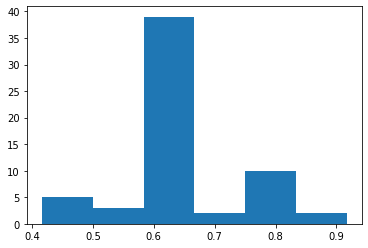

In [5]:
plt.hist(n_correct,bins=6)

(array([ 2.,  7., 10., 15., 13., 14.]),
 array([0.25      , 0.33333333, 0.41666667, 0.5       , 0.58333333,
        0.66666667, 0.75      ]),
 <a list of 6 Patch objects>)

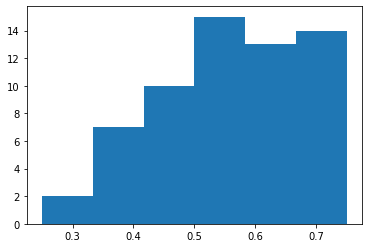

In [6]:
plt.hist(f_correct,bins=6)

(array([ 6., 18., 11., 13., 12.,  1.]),
 array([0.33333333, 0.40277778, 0.47222222, 0.54166667, 0.61111111,
        0.68055556, 0.75      ]),
 <a list of 6 Patch objects>)

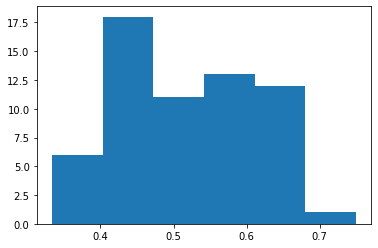

In [7]:
plt.hist(s_correct,bins=6)

In [8]:
print("mean of n_correct = ", np.mean(np.array(n_correct)))
print("mean of f_correct = ", np.mean(np.array(f_correct)))
print("mean of s_correct = ", np.mean(np.array(s_correct)))

print("std of n_correct = ", np.std(np.array(n_correct)))
print("std of f_correct = ", np.std(np.array(f_correct)))
print("std of s_correct = ", np.std(np.array(s_correct)))

mean of n_correct =  0.6326875310481868
mean of f_correct =  0.5219407186620301
mean of s_correct =  0.5156814042059943
std of n_correct =  0.10152922288177606
std of f_correct =  0.12514619932809937
std of s_correct =  0.10852857718990087


In [9]:
# people guessed wrong
for i in range(12):
    if(sexes[i] == 1 and n_model[i] < 0 or 
       sexes[i] == 2 and n_model[i] > 0):
        print("wrong guessed sex: ", i, n_model[i])

wrong guessed sex:  1 20.0
wrong guessed sex:  7 18.0
wrong guessed sex:  9 18.0


In [28]:
n_total_score = 0
f_total_score = 0
s_total_score = 0

for i in range(12):
    multiply = 1
    if(sexes[i] == 2):
        multiply = 1
        
    n_total_score += multiply * n_model[i]
    f_total_score += multiply * f_model[i]
    s_total_score += multiply * s_model[i]
        
print(n_total_score, f_total_score, s_total_score)

for i in range(N):
    print(n_correct[i], f_correct[i], s_correct[i])

151.0 -83.0 65.0
0.6666666666666666 0.6666666666666666 0.5454545454545454
0.75 0.5 0.4166666666666667
0.6666666666666666 0.5833333333333334 0.6666666666666666
0.5833333333333334 0.5833333333333334 0.4166666666666667
0.4166666666666667 0.5 0.3333333333333333
0.5833333333333334 0.4166666666666667 0.4166666666666667
0.4166666666666667 0.5833333333333334 0.6666666666666666
0.6666666666666666 0.5833333333333334 0.4166666666666667
0.5833333333333334 0.4444444444444444 0.4444444444444444
0.75 0.5833333333333334 0.6666666666666666
0.7272727272727273 0.5 0.4
0.7 0.36363636363636365 0.3333333333333333
0.4166666666666667 0.75 0.3333333333333333
0.6666666666666666 0.5833333333333334 0.4166666666666667
0.6666666666666666 0.3333333333333333 0.5833333333333334
0.6666666666666666 0.4166666666666667 0.5
0.6666666666666666 0.5833333333333334 0.5833333333333334
0.75 0.75 0.4166666666666667
0.6666666666666666 0.4166666666666667 0.6666666666666666
0.5833333333333334 0.5 0.4166666666666667
0.583333333333333

In [15]:
stats.f_oneway(n_correct, f_correct, s_correct)

F_onewayResult(statistic=20.65883787975513, pvalue=8.37676627567313e-09)

In [26]:
stats.ttest_ind(n_correct, f_correct)

Ttest_indResult(statistic=5.323201912758691, pvalue=4.818670756914885e-07)